# Book Recommendation System (EDA)

## Problem Statement

**Goal**: <br>
Design book recommendation system by several methods

**Research Question**: 
1. How can we measure how similar two books are based on what’s inside them? How can we use that to recommend books to readers?
2. How can we guess what rating a user might give to a book they haven’t read yet? How can this help in building a recommendation system?
3. What are the good and bad sides of each method used? How can we fix the problems with the weak points?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

## Import Dataset

## Dataset Information

In this project, we are using the **Goodreads dataset**. It was first collected from the Goodreads API in **September 2017** by **Zygmunt Zając** and later updated by **Olivier Simard-Hanley**.

The dataset contains 5 files:

For this project, we will only use **two files**:
- `ratings.csv` (user ratings)  
- `books_enriched.csv` (book metadata)

In [2]:
pd.options.display.float_format = '{:.2f}'.format
r = pd.read_csv('data/ratings.csv')
b = pd.read_csv('data/books_enriched.csv')

In [3]:
b.shape

(10000, 30)

## Data Understanding

### 1. Rating

In [4]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In **dataset r**, there are three columns, which are:
1. `user_id`: user identification number
2. `book_id`: book identification number
3. `rating`: rating given by `user_id`

In [23]:
r.shape

(5976479, 3)

In [29]:
r['user_id'].nunique()

53424

In [31]:
for col in r.columns:
    print(f"Number of {col} is {r[col].nunique()}")

Number of user_id is 53424
Number of book_id is 10000
Number of rating is 5


There are 5,976,479 ratings given by 53,424 people on 10,000 books.

### 2. Books

In [5]:
b.shape

(10000, 30)

In [35]:
b.head(3).T

,0,1,2
Unnamed: 0,0,1,2
index,0,1,2
authors,['Suzanne Collins'],"['J.K. Rowling', 'Mary GrandPré']",['Stephenie Meyer']
average_rating,4.34,4.44,3.57
best_book_id,2767052,3,41865
book_id,1,2,3
books_count,272,491,226
description,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Harry Potter's life is miserable. His parents ...,About three things I was absolutely positive.\...
genres,"['young-adult', 'fiction', 'fantasy', 'science...","['fantasy', 'fiction', 'young-adult', 'classics']","['young-adult', 'fantasy', 'romance', 'fiction..."
goodreads_book_id,2767052,3,41865


## Exploring Book Metadata

The dataset has **30 columns**, but after checking, many of them are repeated or unnecessary.  
For example, there are multiple columns for book IDs, titles, and authors. Some columns also give detailed review counts that may not be useful.

To make the metadata cleaner and easier to work with, I will perform **data preprocessing**.

### Columns in `books_enriched.csv`:

- **Identification-related**:  
  `book_id`, `goodreads_book_id`, `best_book_id`, `work_id`, `isbn`, `isbn13`

- **Title-related**:  
  `original_title`, `title`

- **Author-related**:  
  `authors`, `authors_2`

- **Publication year-related**:  
  `original_publication_year`, `publishDate` (the publication date)

- **Rating-related**:  
  `average_rating`, `ratings_count` (number of reviews),  
  `work_ratings_count`, `work_text_reviews_count`,  
  `ratings_1`, `ratings_2`, `ratings_3`, `ratings_4`, `ratings_5`

- **Image URLs**:  
  `image_url`, `small_image_url`

- **Other details**:  
  - `books_count`: Number of editions available  
  - `language_code`: Language code of the book  
  - `genres`: Main Goodreads genre tags  
  - `pages`: Total number of pages  
  - `description`: Summary of the book content  
  - `Unnamed: 0`, `index`: Extra columns that can be dropped


## Statistical summary

## Exploring Columns

Before deciding which columns to keep, let's first explore the data.

To make things easier, we will split the columns into two types:
- **Numerical columns**: contain numbers (like ratings, pages, etc.)
- **Categorical columns**: contain text or labels (like title, authors, genres, etc.)

Then, we can check the **summary statistics** of these columns to understand the data better.


In [6]:
nums = b.select_dtypes(include=[np.number]).columns
cats = b.select_dtypes(exclude=[np.number]).columns

In [39]:
b[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
index,10000.00,4526.32,2567.92,0.00,2351.75,4567.50,6661.25,9999.00
average_rating,10000.00,4.00,0.25,2.47,3.85,4.02,4.18,4.82
best_book_id,10000.00,5471213.58,7827329.89,1.00,47911.75,425123.50,9636112.50,35534230.00
book_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
books_count,10000.00,75.71,170.47,1.00,23.00,40.00,67.00,3455.00
goodreads_book_id,10000.00,5264696.51,7575461.86,1.00,46275.75,394965.50,9382225.25,33288638.00
isbn13,9415.00,9755044298883.46,442861920665.57,195170342.00,9780316192995.00,9780451528640.00,9780830777175.00,9790007672390.00
original_publication_year,9979.00,1981.99,152.58,-1750.00,1990.00,2004.00,2011.00,2017.00
pages,9927.00,359.42,216.95,0.00,250.00,336.00,424.00,5216.00


## Observations from Initial Exploration

- There are several ID-related columns (`Unnamed: 0`, `index`, `best_book_id`, `goodreads_book_id`, `isbn13`, `work_id`) that are mostly duplicates or not needed.  
  We'll keep only `book_id` since it's important for merging with the ratings data.

- The oldest book in the dataset dates back to **1750 BC**, which is shown as `-1750`.

- The **average rating** across books is around **4.0**, which suggests that users generally rate books quite positively.

- There are some entries with **0 pages**, which is unrealistic. Books usually have **at least 80 pages** to be officially published.

- In terms of popularity (based on number of reviews):  
  - The **most reviewed book** has over **4.7 million reviews**  
  - The **least reviewed book** has around **2.7 thousand reviews**


In [41]:
b[cats].describe().T

,count,unique,top,freq
authors,10000,5057,['Stephen King'],58
description,9943,9772,The first in a spectacularly genre-mashing adv...,4
genres,10000,4351,"['fantasy', 'fiction']",152
image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/11...,3332
isbn,9300,9300,439023483,1
language_code,10000,41,eng,9680
original_title,9415,9274,,5
publishDate,9992,4679,"(None, None, None)",75
small_image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/50...,3332
title,10000,9964,Selected Poems,4


## More Insights from the Data

- **Stephen King** appears the most in the author column — he's the most popular author in the dataset.

- The book **"Selected Poems"** shows up **4 times**. We need to check if these are different editions or duplicates.

- Since we already have `original_publication_year`, the column `publishDate` is not needed and will be removed.

- Some columns like `authors`, `genres`, `publishDate`, and `authors_2` contain **extra or messy characters**, so we’ll need to clean them up during preprocessing.


In [7]:
not_unique_nums = ['average_rating', 'books_count', 'original_publication_year', 'pages', 
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count', 
                    'work_ratings_count', 'work_text_reviews_count']

## Univariate Analysis

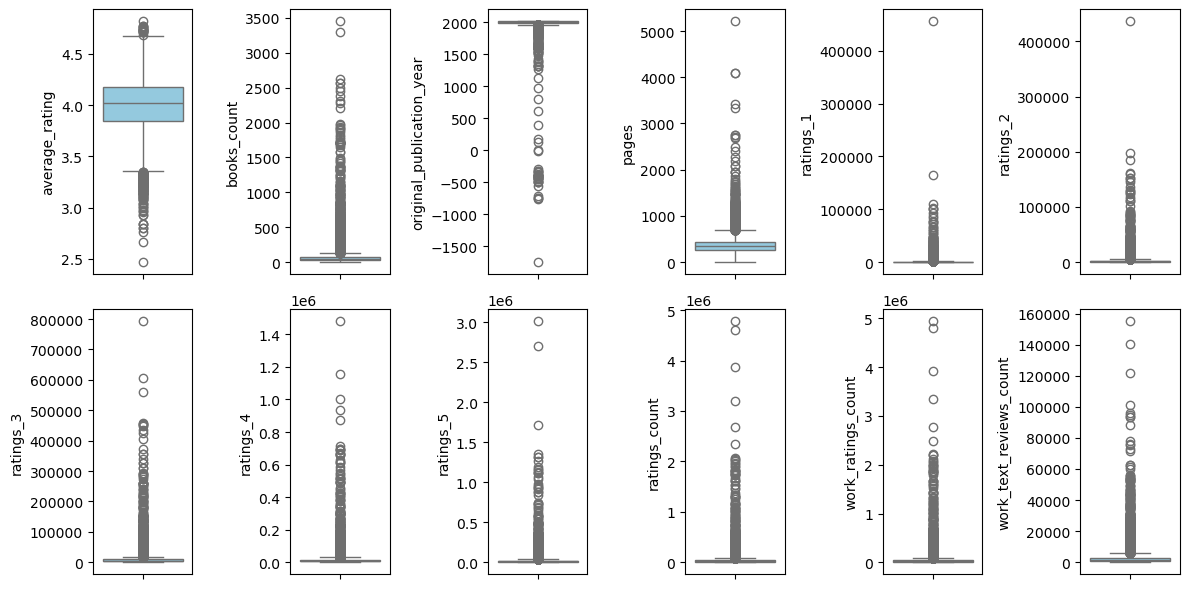

In [45]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = not_unique_nums
for i in range(0, len(features)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=b[features[i]], color='skyblue')
    plt.tight_layout()

The data varies greatly, so there is no need to clean the outliers. 

## Bivariate Analysis

Now, let's check the correlation between columns.

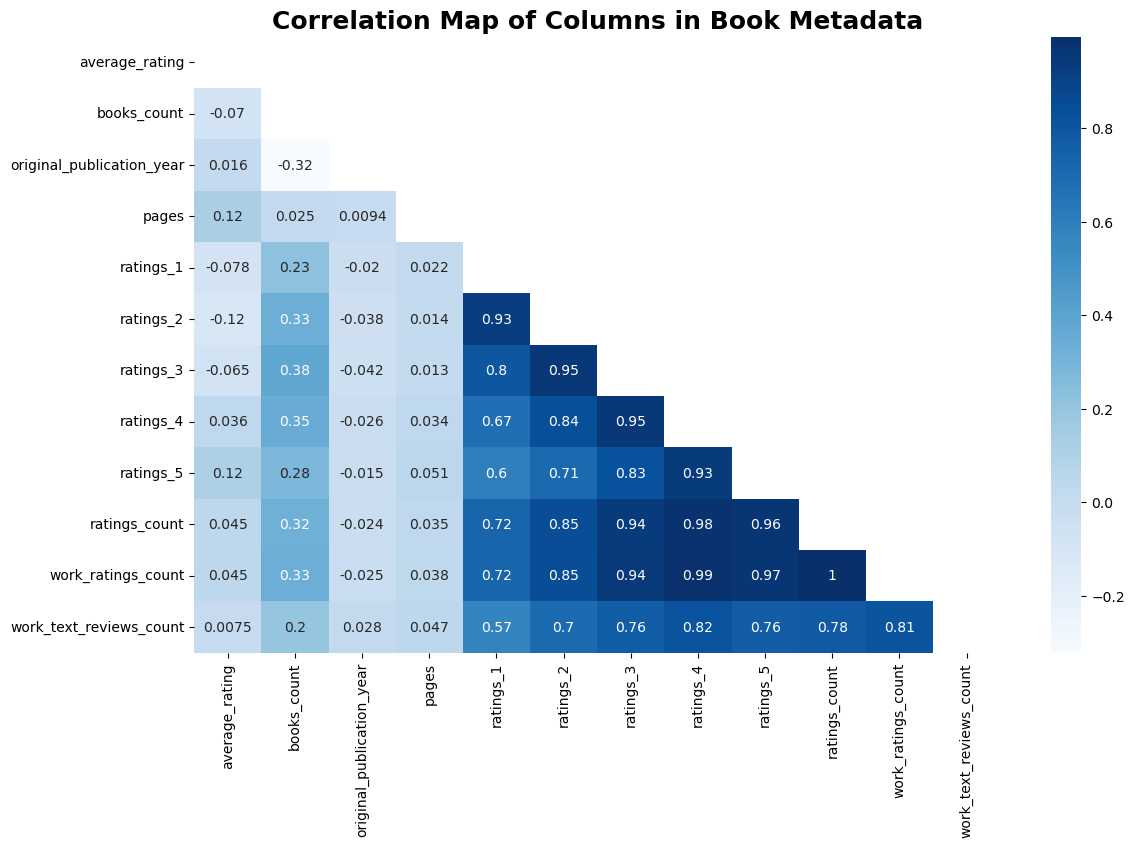

In [47]:
#build correlation table
corr = b[not_unique_nums].corr()

# create heatmap
upper_triangle = np.triu(corr)
plt.figure(figsize=(13,8))
sns.heatmap(corr, cmap="Blues", annot=True, mask=upper_triangle)
plt.title('Correlation Map of Columns in Book Metadata', weight='bold', fontsize=18)
plt.show()

- There is multicollinearity between ratings related columns. We can also see that the higher ratings show higher correlation to `work_ratings_count` and `work_text_reviews_count`. People tend to leave reviews for books they like. I will only use `ratings_count`.
- There is a high correlation between `original_publication_year` and `books_count`. It makes sense since the older book probably has been printed more and translated to many languages.

## Data Preprocessing

Our next step is data preprocessing. In building machine learning models, we should check for missing values and duplicated rows in our data. In this process we should also transform data into a format that is easier and more effective to process, so that our model will produce more accurate results.

### Missing Value and Duplicated Rows

In [9]:
#check missing value
dataset = [r, b]
for data in dataset:
    print(data.isnull().values.any())

False
True


In [10]:
#check duplicated rows
for data in dataset:
    print(data.duplicated().values.any())

False
False


There is no duplicate row in both dataset, but we have missing value in book metadata.

In [11]:
#make a copy 
books = b.copy()

In [12]:
percent_missing = books.isnull().sum() * 100 / len(books)
missing_value = (pd.DataFrame({'percent_missing': percent_missing})).sort_values(by=['percent_missing'], ascending=False)
missing_value[missing_value['percent_missing']>0]

,percent_missing
isbn,7.00
original_title,5.85
isbn13,5.85
pages,0.73
description,0.57
original_publication_year,0.21
publishDate,0.08


- Impute `original_publication_year` by using `publishDate`, then drop `publishDate`. I chose `original_publication_year` because it has the same format meanwhile `publishDate` has various data styles.
- Impute `pages` with median.
- Impute `description` with book's title
- Drop `isbn`, `original_title`, `isbn13`, there is no need to impute these columns.

In [13]:
#compare original_publication_year and publishdate when original_publication_year is null
books[books['original_publication_year'].isnull()][['original_publication_year', 'publishDate']]

,original_publication_year,publishDate
198,NaN,October 28th 2008
3249,NaN,February 7th 2006
3881,NaN,September 29th 2009
4252,NaN,November 10th 2010
4303,NaN,June 23rd 2009
4392,NaN,April 8th 2013
5001,NaN,November 9th 2004
5208,NaN,December 6th 2010
5648,NaN,October 11th 2006
7163,NaN,November 25th 2004


Lucky that all rows that are invalid in `original_publication_year` has the year in `publishDate`. Therefore, we can get year in `publishDate` and impute it to `original_publication_year`.

In [14]:
#get year from publishDate to original_publication_year
books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)
books['publishDate'] = books['publishDate'].str.extract('(\d{4})$').fillna('')
books['original_publication_year'] = books['original_publication_year'].fillna(books['publishDate'])
books['description'] = books['description'].fillna(books['title'])

In [15]:
#impute null in pages with median
books['pages'] = books['pages'].fillna(books['pages'].median())

In [16]:
#drop unnecessary columns with null
books = books.drop(['isbn', 'original_title', 'isbn13', 'publishDate'], axis=1)

In [17]:
#check missing value
books.isnull().values.any()

False

Now we have no missing value anymore!

### Feature Engineering

In [18]:
#keep important columns, drop the rest
cols_to_keep = ['book_id', 'title', 'authors', 'original_publication_year', 'pages', 'description', 'genres', 'average_rating', 'ratings_count', 'books_count']
books = books[cols_to_keep]

Now, let's check the value in each columns. In order to find any strange characters, we need to display column width to maximum. 

In [19]:
#display max column
with pd.option_context('display.max_colwidth', None):
    display(books.head(5))

,book_id,title,authors,original_publication_year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008.00,374.00,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.","['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.34,4780653,272
1,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997.00,309.00,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.","['fantasy', 'fiction', 'young-adult', 'classics']",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005.00,501.00,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.","['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.57,3866839,226
3,4,To Kill a Mockingbird,['Harper Lee'],1960.00,324.00,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American l

In our top 5 entry, we found unnecessary characters that are not supposed to be in `description` column. We need to delete that unnecessary characters in order to make better result in finding similar books. It is actually time consuming to check it one by one, but we tried our best to capture all unnecessary characters and try to guess the rest. And then we delete that unnecessary characters and make all fonts lowercase.

In [20]:
#delete unnecessary characters from authors, genres and description column
col_trans = ['authors', 'genres', 'description']
for col in col_trans:
    books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True) 
books['description'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]" : ""}, regex=True, inplace=True)
books['description'] = books['description'].str.lower()

In [21]:
#rename column and change year, pages, and book_count to integer
books.rename(columns = {'original_publication_year':'year'}, inplace = True)
books[['year', 'pages', 'books_count']] = books[['year', 'pages', 'books_count']].astype(int)

We try to check 10 samples. If they are looking good (there are no unnecessary characters anymore) then we are good to go!

In [22]:
with pd.option_context('display.max_colwidth', None):
    display(books.sample(10))

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
7664,9251,"Lucky (Lucky Santangelo, #2)",Jackie Collins,1985,598,she’s a hotblooded beauty in love with power hungry for pleasure… wild notorious trouble… she’s… lucky the fabulous heroine of chances returnswith the sensual grace of a panther lucky santangelo prowled her las vegas casino restless ready eager for action that night began a dazzling odyssey filled with dangerous passion and sundrenched sex sadistic vengeance and breathless suspense from the decadent luxury of california to paris new york and a private greek island lucky fought for her father’s honor for ruthless triumph for the wild card of a fabulous love her rivals; an icecold hollywood wife…a muchmarried heiress strung out on cocaine…a jaded magnate hooked on power…a crazed hoodlum lusting for murder but lucky was a gambier and a lover a woman who ruled her empire and pursued her man with the potent santangelo strength … her way on her terms whatever the odds jackie collins tops the sensational success of hollywood wives and chances with lucky “so hot it will have to be printed on asbestos”,"fiction, romance, chicklit, contemporary, thriller, crime",4.08,9994,29
8077,9870,"Dark River (Warriors: Power of Three, #2)",Erin Hunter,2007,322,the three children of squirrelflight and brambleclaw grandchildren of the great leader firestar have thrived in their apprenticeships lionpaws strength and energy serve him well as a warrior in training hollypaw hones her understanding of the warrior code and jaypaw explores his mysterious powers and connection to starclan as the medicine cat apprentice with more experience comes both power and danger lionpaw makes a friendshipâ€”and a discoveryâ€”that must be kept hidden; jaypaw learns a secret that could benefit thunderclan by damaging others; and hollypaw knows something that could avert a battle if she could convince the rest of her clan the three are torn apart as each discovers darkness in themselves in the clans and in the past and as conflict begins over what it means to be a warrior rising tensions threaten to overflow washing away the peace that has existed for many moons,"fantasy, fiction, youngadult",4.27,13323,31
6033,6932,The Executioner's Song,Norman Mailer,1979,1056,in what is arguably his greatest work americas most heroically ambitious writer follows the short blighted career of gary gilmore an intractably violent product of americas prisons who became notorious for two reasons first for robbing two men in 1976 then killing them in cold blood; and second after being tried and convicted for insisting on dying for his crime to do so he had to fight a system that seemed paradoxically intent on keeping him alive long after it had sentenced him to deathnorman mailer tells gilmores storyand those of the men and women caught up in his procession toward the firing squadwith implacable authority steely compassion and a restraint that evokes the parched landscapes and stern theology of gilmores utah the executioners song is a trip down the wrong side of the tracks to the deepest sources of american loneliness and violence it is a towering achievementimpossible to put down impossible to forgetwinner of the 1980 pulitzer prize,"nonfiction, crime, biography, classics, history, mystery",4.07,13829,33
2847,3066,"Four Blind Mice (Alex Cross, #8)",James Patterson,2002,416,detective alex cross is on his way to resign from the washington dc police force when his partner shows up at his door with a case he cant refuse one of john sampsons oldest friends from their days in vietnam has been arrested for murder worse yet he is subject to the iron hand of the united states army the evidence against him is strong enough to send him to the gas chamber but sampson is certain his friend has been frameddrawing on their years of street training and an almost telepathic mutual trust cross and sampson go deep behind military lines to confront the mos

## Export Data

In [23]:
books.to_csv('data/books_cleaned.csv')